In [34]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg, NavigationToolbar2Tk
from sklearn.model_selection import train_test_split, GridSearchCV
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
import tkinter
import seaborn as sns
from sklearn.svm import SVC
from sklearn.metrics import mean_squared_error, r2_score
%matplotlib inline

In [35]:
class BuildModel:
    def __init__(self,data):
        self.data = data
    
    def disphead(self, rows=5):
        return self.data.head(rows)
    
    def removena(self):
        self.data = self.data.dropna(how='any', axis=1)
        plt.figure(figsize=(15,5))
        sns.heatmap(self.data.isna())
        plt.show()
        return self.data
    
    def preprocess(self):
        x = self.data['X'].values
        y = self.data['Y'].values
        x_train, x_test, y_train, y_test = train_test_split(x.reshape(-1,1), y.reshape(-1,1),
                                                            test_size=0.4, random_state=60)
        return {
            "x_train": x_train,
            "x_test": x_test,
            "y_train":y_train,
            "y_test": y_test
        }

    def build(self):
        pipe = Pipeline([('lr', LinearRegression())])
        mod = pipe.fit(self.preprocess()['x_train'], self.preprocess()['y_train'])
        print("perfomance on train set %f"%mod.score(self.preprocess()['x_train'], self.preprocess()['y_train']))
        print("perfomance on test set %f"%mod.score(self.preprocess()['x_test'], self.preprocess()['y_test']))
        return mod
        
    def predict(self):
        res = self.build()
        y_pred = res.predict(self.preprocess()['x_test'])
        return y_pred
    
    def evaluate(self):
#         print("mean squared error %f"%mean_squared_error(self.preprocess()['y_test'], self.predict()))
        print("r2 score %f"%r2_score(self.preprocess()['y_test'], self.predict()))

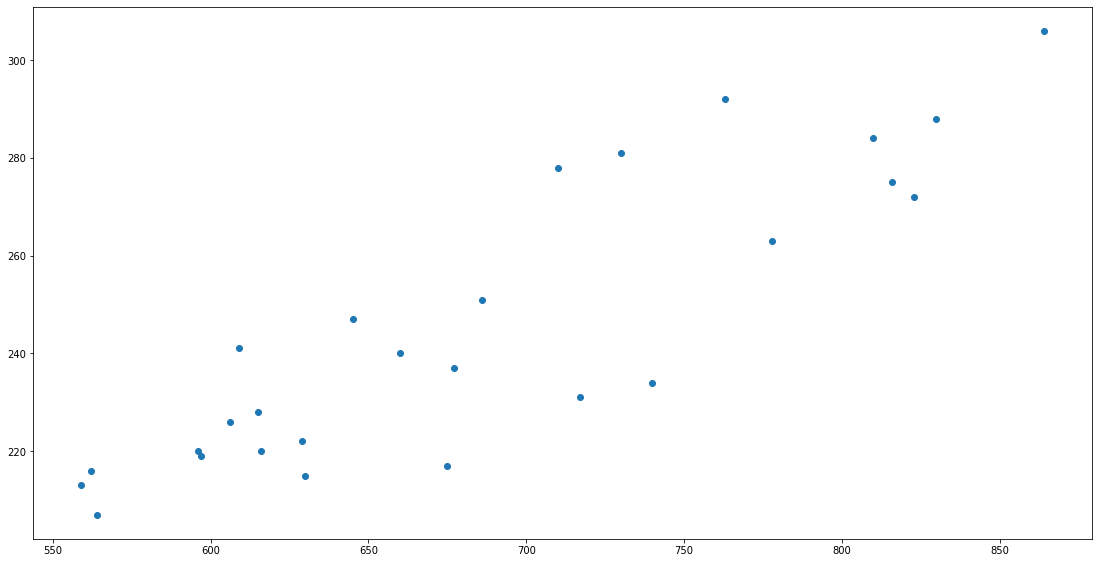

In [38]:
class App:
    def __init__(self, root, x_train, y_train):
        self.root = root
        self.x_train = x_train
        self.y_train = y_train
        self.plotdata()
        
    def plotdata(self):
        self.frame = tkinter.Frame(self.root)
        fig, axis = plt.subplots(figsize=(30,10))
        axis.scatter(self.x_train, self.y_train)
        canvas = FigureCanvasTkAgg(fig, master=self.root)
        canvas.get_tk_widget().pack()
        toolbar = NavigationToolbar2Tk(canvas,self.root)
        toolbar.update()
        canvas.get_tk_widget().pack()
        
        
if __name__ == '__main__':
    data = pd.read_csv('../Data/regdata/kangaroo/2056204_nose.csv').dropna(axis=0)
    model = BuildModel(data)
    root = tkinter.Tk()
    app = App(root, model.preprocess()['x_train'], model.preprocess()['y_train'])
    root.mainloop()